#Maxim Quénel

#Cyprien Mouton

#Elouan Quinou

#Importation of defects

The dough roll is represented by a linear space with a fixed length of 500 units. The goal here is to optimally position different types of cookies on the roll, while both respecting constraints related to the defects present on the roll, avoiding overlaps, as well as minimizing the amount of unused portions of dough.

Each type of cookie has specific characteristics:

    Size: The number of units of the roll's length that the cookie occupies.
    Value: The profit generated by the cookie's production.
    Defect thresholds: The maximum number of defects of each class ('a', 'b', 'c') that can be tolerated within the area the cookie occupies.

The dough roll contains defects distributed along its length, with each defect characterized by:

    Position: The specific unit on the roll where the defect is located.
    Class: A category (e.g., 'a', 'b', 'c') indicating the potential impact on the cookies.

The issue is to organize the cookies on the roll in such a way that:

    They do not overlap.
    They respect the defect thresholds for each cookie.
    The overall profit is maximized, while minimizing penalties for unused portions of the roll (each unused unit incurs a penalty of -1).

We have decided to represent this roll as shown in sorted_defect_test.



Challenges :


1 ) Each type of cookie has specific thresholds for defect classes ('a', 'b', 'c'). If an area exceeds these thresholds, placing the cookie in said area becomes impossible. This requires analyzing the distribution of defects for each possible position on the roll.

2 ) With the roll being of a fixed length (500 units), the space must be used efficiently to maximize the number of cookies placed while minimizing empty spaces.

3 )Cookies must not overlap, adding an additional requirement to our problem and further complicating the search for viable solutions.

4 )The sizes, values, and defect tolerance thresholds differ across every cookie types. This requires finding a balance between maximizing profit and sticking to the different constraints we've established.


Objectives


Maximize the profits when placing the cookies

Minimize the unused areas of the dough roll

Find an optimal solution in the shortest amount of time despite the multiple facets of our problem

We start by loading the defects provided in the defects.csv file. Then, we build a dictionary where each position on the roll is associated with the defects present at that location. If a position contains no defects, we assign it the value 'o', which represents the absence of defects.

The defects extracted from the CSV file are first converted to integers, as they were initially stored as floats.

We then use a sorted copy of the dictionary, named sorted_defects, to create a representation in the form of a list of lists, named sorted_defects_test, to structure the problem. Each element in this list corresponds to a position on the roll, where each position contains a list of the defects present or 'o' if there are no defects.

Finally, this list is used to represent the problem with the variable roll, which organizes all the defects across the length of the dough roll.


In [1]:
import pandas as pd
import random
import copy
import math
import matplotlib.pyplot as plt
import time
import numpy as np

df1 = pd.read_csv("defects.csv")


In [2]:
df1

,x,class
0,355.449335,c
1,92.496236,a
2,141.876795,c
3,431.833902,c
4,435.028461,c
...,...,...
495,171.161186,a
496,365.899255,a
497,157.372180,b
498,275.538229,b


In [3]:


df1 = pd.read_csv("defects.csv")
df1['x'] = df1['x'].astype(int)
defects = {}

# Remplir le dictionnaire
for _, row in df1.iterrows():
    x = row['x']
    classe = row['class']
    if x not in defects:
        defects[x] = []
    defects[x].append(classe)


sorted_defects = dict(sorted(defects.items()))
sorted_defects_test= sorted_defects.copy()
for x in range(500):
    if x not in sorted_defects:
        sorted_defects_test[x] = ['o']


sorted_defects_test = dict(sorted(sorted_defects_test.items()))
roll = [sorted_defects_test[i] for i in range(500)]


In [4]:
roll1 = copy.deepcopy(roll)
roll1

[['a', 'a'],
 ['a'],
 ['a', 'b'],
 ['b', 'a'],
 ['o'],
 ['o'],
 ['o'],
 ['o'],
 ['c'],
 ['c', 'c'],
 ['c', 'b'],
 ['o'],
 ['a'],
 ['o'],
 ['a'],
 ['o'],
 ['a', 'c'],
 ['o'],
 ['o'],
 ['b'],
 ['o'],
 ['b'],
 ['a', 'b'],
 ['a', 'a'],
 ['o'],
 ['a'],
 ['a', 'c'],
 ['o'],
 ['o'],
 ['a'],
 ['b'],
 ['o'],
 ['a'],
 ['b'],
 ['b'],
 ['b', 'c'],
 ['a', 'b'],
 ['b'],
 ['a'],
 ['c', 'c'],
 ['c', 'c'],
 ['c'],
 ['o'],
 ['o'],
 ['b', 'a'],
 ['o'],
 ['a', 'b'],
 ['c'],
 ['a', 'b'],
 ['c'],
 ['c'],
 ['b', 'c', 'a', 'c'],
 ['o'],
 ['a'],
 ['b'],
 ['c', 'a'],
 ['o'],
 ['c'],
 ['a'],
 ['b', 'c', 'c', 'a'],
 ['o'],
 ['o'],
 ['o'],
 ['o'],
 ['c'],
 ['c'],
 ['o'],
 ['o'],
 ['c', 'b'],
 ['a'],
 ['o'],
 ['o'],
 ['c', 'b', 'b'],
 ['a'],
 ['c', 'c'],
 ['o'],
 ['a'],
 ['a', 'a'],
 ['o'],
 ['o'],
 ['o'],
 ['o'],
 ['b', 'b', 'c'],
 ['a', 'c', 'b'],
 ['c'],
 ['a', 'a'],
 ['o'],
 ['o'],
 ['o'],
 ['c'],
 ['o'],
 ['c'],
 ['a'],
 ['a', 'a'],
 ['c'],
 ['a', 'c'],
 ['b'],
 ['c', 'c', 'c'],
 ['c', 'c'],
 ['o'],
 ['o'],
 [

In [5]:
biscuits = [
    (4, 3, {'a': 4, 'b': 2, 'c': 3}),
    (8, 12, {'a': 5, 'b': 4, 'c': 4}),
    (2, 1, {'a': 1, 'b': 2, 'c': 1}),
    (5, 8, {'a': 2, 'b': 3, 'c': 2})
]


To test different cookie positions, we need to make sure that the desired starting position and the entire length of the cookie do not contain more defects than the cookie can tolerate. In other words, we must verify that the cookie can be placed without exceeding the allowed defect thresholds.

This is the purpose of the can_place_biscuit function. This function takes as input the roll list representing the dough roll, the starting position for placing the cookie, the cookie's length named biscuit_length, and a dictionary called max_defects specifying the maximum allowed defect thresholds for each class.

The function iterates through the positions on the roll corresponding to where the cookie would be placed (from start to start + biscuit_length) and counts the defects present at each position. If a defect is found (anything other than 'o' in the list), it is counted as one more defect for its corresponding class ('a', 'b' or'c'). If, at any point, the number of defects for a class exceeds the threshold allowed by the cookie, the function returns False, indicating that the cookie cannot be placed at this position. If no limits are exceeded, the function returns True, meaning the placement is possible.


In [6]:
def can_place_biscuit(roll, start, biscuit_length, max_defects):
    #Vérifie si un biscuit peut être placé à une position donnée.
    defect_counts = {'a': 0, 'b': 0, 'c': 0}
    for i in range(start, start + biscuit_length):
        if i >= len(roll):
            return False
        for defect in roll[i]:
            if defect != 'o':
                defect_counts[defect] = defect_counts.get(defect, 0) + 1
                if defect_counts[defect] > max_defects.get(defect, 0):
                    return False
    return True


#Simulated Annealing

Here is the Simulated Annealing algorithm used to solve the optimization problem of placing cookies on the dough roll. This algorithm performs a series of iterations, where at each step, proceeds to randomly choose to either add or move a cookie, and then evaluates whether this new arrangement improves the placement compared to the previous solution.
Steps of the Algorithm:

random_initial_placement:

This function performs the initial placement of cookies on the 500 units of the roll. Each position is filled randomly while ensuring that the cookies respect the defect constraints.

place_biscuit:

This function places a cookie on the roll and records the indices of the cookie's position in an index list. Each cookie is assigned a unique identifier, which is saved to enable its removal or displacement later.

remove_biscuit and remove_overlapping_biscuits:

    remove_biscuit: Removes a cookie from the roll. This is used when moving a cookie and its old position must be cleared.
    remove_overlapping_biscuits: Removes cookies located in the area where a new cookie is to be placed, preventing overlapping.

evaluate_placement:

This function evaluates the quality of the current arrangement by calculating the score of the roll. The score is based on the value of the placed cookies and considers unused positions (those without cookies), where each unused position incurs a penalty of -1.
Simulated Annealing:

The main Simulated Annealing algorithm works as such:

    Random Choice: At each iteration, the algorithm randomly chooses between adding or moving a cookie.

    Constraint Validation: During the addition or movement of a cookie, a validation is performed to make sure the defect constraints are respected.

    Conflict Resolution: If the constraints are satisfied, the cookie is placed in its new position, and conflicting cookies (overlapping ones) are removed.

    Evaluate Solution: Once the new arrangement is made, it is evaluated using the evaluate_placement function.

    Solution Acceptance:
        If the new solution’s score is higher than the current one, it becomes the new current solution.
        If the score is lower, the new arrangement is accepted with a probability that depends on the algorithm's temperature. This probability is calculated with the exponential of the score difference divided by the current temperature, allowing the algorithm to explore suboptimal solutions to avoid getting stuck in local optima.

    Best Solution Update: After accepting a new solution, the algorithm checks if its score is better than the best solution found so far. If so, this becomes the best solution.

    Temperature Reduction: The temperature is gradually reduced (based on a cooling rate), which decreases the likelihood of accepting worse solutions as the iterations progress.

This iterative process allows the algorithm to explore the solution space effectively, balancing exploration and exploitation, and converging toward an optimal or near-optimal solution.



At first, we considered including a code portion that would remove a cookie from the roll among the possible actions. However, we ultimately decided to remove this option as it made the results less interesting.

Originally, to remove a cookie that needed to be replaced by another, we modified the roll's representation to mark both the beginning and the end of the cookie. This made validating the placement of cookies more complex and the representation less readable. This approach quickly became difficult to manage and overly complicated.

As a result, we decided to use indices for placed cookies instead. This method made it easier to handle the addition and removal of cookies, if needed. By using these indices, we simplified the process of managing overlapping cookies and improved the organization of the code. Although this approach was challenging to implement, it allowed us to better control cookie management while streamlining the tracking of placements and removals.


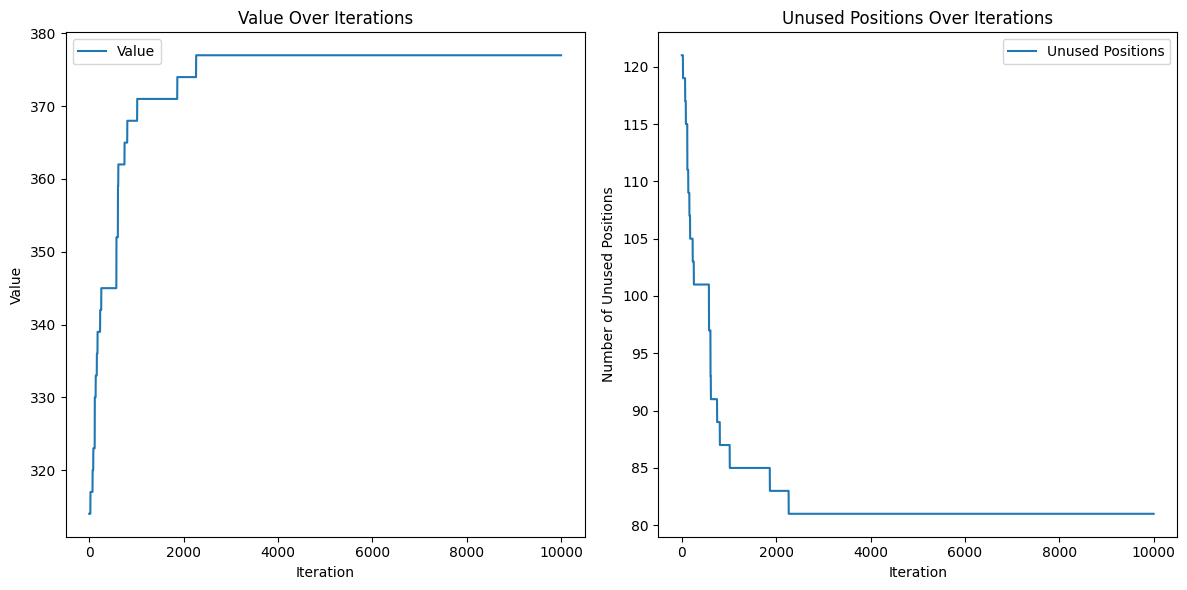

Temps d'exécution : 27.11418 secondes
meilleur score atteint au bout de la 2265 itérations

Valeur maximale obtenue : 377
Nombre de cases sans biscuit : 81

Rouleau final :

Case 000:Non utilisée - Défauts : ['a', 'a']
Case 001: Biscuit_0 - Défauts : ['a']
Case 002: Biscuit_0 - Défauts : ['a', 'b']
Case 003: Biscuit_0 - Défauts : ['b', 'a']
Case 004: Biscuit_0 - Défauts : ['o']
Case 005: Biscuit_0 - Défauts : ['o']
Case 006: Biscuit_0 - Défauts : ['o']
Case 007: Biscuit_0 - Défauts : ['o']
Case 008: Biscuit_0 - Défauts : ['c']
Case 009:Non utilisée - Défauts : ['c', 'c']
Case 010: Biscuit_3 - Défauts : ['c', 'b']
Case 011: Biscuit_3 - Défauts : ['o']
Case 012: Biscuit_3 - Défauts : ['a']
Case 013: Biscuit_3 - Défauts : ['o']
Case 014: Biscuit_3 - Défauts : ['a']
Case 015:Non utilisée - Défauts : ['o']
Case 016: Biscuit_0 - Défauts : ['a', 'c']
Case 017: Biscuit_0 - Défauts : ['o']
Case 018: Biscuit_0 - Défauts : ['o']
Case 019: Biscuit_0 - Défauts : ['b']
Case 020: Biscuit_2 - Défauts 

In [7]:
def random_initial_placement(roll, biscuits):
  #Place de manière aléatoire les biscuit
    n = len(roll)
    placement = []  # Liste des biscuits placés
    biscuit_indices = []  # Liste des indices des biscuits placés
    for i in range(n):
        if random.random() < 0.7:
            biscuit = random.choice(biscuits)
            biscuit_length, _, max_defects = biscuit

            if i + biscuit_length <= n and can_place_biscuit(roll, i, biscuit_length, max_defects):
                placement.append((i, biscuit))
                place_biscuit(roll, i, biscuit_length, biscuits.index(biscuit), biscuit_indices)
    return placement, biscuit_indices

def place_biscuit(roll, start, biscuit_length, biscuit_id, biscuit_indices):
    for i in range(start, start + biscuit_length):
        roll[i] = [f"Biscuit_{biscuit_id}"]
    biscuit_indices.append([start, start + biscuit_length - 1])


def remove_biscuit(roll, start, biscuit_length):
    for i in range(start, start + biscuit_length):
        roll[i] = ["Non utilisé"]


def remove_overlapping_biscuits(roll, start, end, biscuit_indices):
    indices_to_remove = []  # Liste des biscuits à supprimer
    for idx, (biscuit_start, biscuit_end) in enumerate(biscuit_indices):
        if ((biscuit_start<=start and biscuit_end>=end)or(biscuit_start<=start and biscuit_end>=start)or(biscuit_start>=start and biscuit_end<=end)or(biscuit_start<=end and biscuit_end>=end )):  # Vérifie si les indices des biscuits chevauchent la plage


            indices_to_remove.append(idx)

            for i in range(biscuit_start, biscuit_end + 1):
                roll[i] = ["Non utilisé"]
    for idx in sorted(indices_to_remove, reverse=True):
        biscuit_indices.pop(idx)



def evaluate_placement(placement, roll, biscuits, penalties):
  #Donne un score à la solution
    value = 0
    used_positions = set()
    for start, biscuit in placement:
        if start not in used_positions:

            _, biscuit_value, _ = biscuit
            value += biscuit_value

            used_positions.update(range(start, start + biscuit[0]))
    unused_positions = len([i for i in range(len(roll)) if i not in used_positions])
    value -= unused_positions * penalties
    return value, unused_positions

def visualize_results(values, unused_positions):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(values, label="Value")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.title("Value Over Iterations")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(unused_positions, label="Unused Positions")
    plt.xlabel("Iteration")
    plt.ylabel("Number of Unused Positions")
    plt.title("Unused Positions Over Iterations")
    plt.legend()

    plt.tight_layout()
    plt.show()

def simulated_annealing(roll, biscuits, penalties, initial_temp, cooling_rate, iterations):
    n = len(roll)  # Longueur du rouleau
    current_roll = copy.deepcopy(roll)  # Copie du rouleau initial
    current_placement, current_biscuit_indices = random_initial_placement(current_roll, biscuits) #Ecrit un premier placement aléatoire
    current_value, current_unused_positions = evaluate_placement(current_placement, current_roll, biscuits, penalties)  # Évaluation du placement initial

    best_roll = copy.deepcopy(current_roll)
    best_placement = copy.deepcopy(current_placement)
    best_biscuit_indices = copy.deepcopy(current_biscuit_indices)
    best_value = current_value
    best_unused_positions = current_unused_positions

    temperature = initial_temp
    values_over_time = []  # Suivi des valeurs au cours des itérations
    unused_positions_over_time = []  # Suivi des positions inutilisées
    iteration = 0
    last_iteration=0

    for iteration in range(iterations):
        iteration +=1
        new_roll = copy.deepcopy(current_roll)
        new_placement = copy.deepcopy(current_placement)
        new_biscuit_indices = copy.deepcopy(current_biscuit_indices)

        action = random.choice(['add', 'move'])
        if action == 'add':
            for i in range(4):
                start = random.randint(0, n - 1)  # Position de départ aléatoire
                biscuit = biscuits[i]

                biscuit_length, _, max_defects = biscuit
                if start + biscuit_length <= n and can_place_biscuit(new_roll, start, biscuit_length, max_defects):  # Vérifie si le biscuit peut être ajouté sans restriction
                    end = start + biscuit_length - 1
                    remove_overlapping_biscuits(new_roll, start, end, new_biscuit_indices)  # Supprime les biscuits qui chevauchent cette position
                    new_placement.append((start, biscuit)) #ajoute le biscuit a la liste des biscuits placés
                    place_biscuit(new_roll, start, biscuit_length, biscuits.index(biscuit), new_biscuit_indices)  #ajoute le biscuit sur le roll
                    break

        elif action == 'move' and new_placement:
            moved = random.choice(new_placement)
            start = random.randint(0, n - 1)
            biscuit = moved[1]
            biscuit_length, _, max_defects = biscuit


            if start + biscuit_length <= n and can_place_biscuit(new_roll, start, biscuit_length, max_defects):
                end = start + biscuit_length - 1
                remove_overlapping_biscuits(new_roll, start, end, new_biscuit_indices)
                new_placement.remove(moved)  # Retire le biscuit de son emplacement précédent

                remove_biscuit(new_roll, moved[0], moved[1][0])  # Nettoie les anciennes positions
                new_placement.append((start, biscuit))

                place_biscuit(new_roll, start, biscuit_length, biscuits.index(biscuit), new_biscuit_indices)

        new_value, new_unused_positions = evaluate_placement(new_placement, new_roll, biscuits, penalties)

        delta = new_value - current_value

        if delta != 0 or random.random() < math.exp(delta / temperature):
            current_roll = new_roll
            current_placement = new_placement
            current_biscuit_indices = new_biscuit_indices
            current_value = new_value
            current_unused_positions = new_unused_positions


            if current_value > best_value:
                best_roll = current_roll
                best_placement = current_placement
                best_biscuit_indices = current_biscuit_indices
                best_value = current_value
                best_unused_positions = current_unused_positions
                last_iteration = iteration


        temperature *= cooling_rate   # Diminue la température selon le taux de refroidissement
        values_over_time.append(current_value)  # Suivi des valeurs
        unused_positions_over_time.append(current_unused_positions)  # Suivi des positions inutilisées

    visualize_results(values_over_time, unused_positions_over_time)

    return best_value, best_roll, best_placement, best_unused_positions, best_biscuit_indices,last_iteration

biscuits = [
    (4, 3, {'a': 4, 'b': 2, 'c': 3}),
    (8, 12, {'a': 5, 'b': 4, 'c': 4}),
    (2, 1, {'a': 1, 'b': 2, 'c': 1}),
    (5, 8, {'a': 2, 'b': 3, 'c': 2})
]


roll = copy.deepcopy(roll1)
penalties = 1
initial_temp = 1000
cooling_rate = 0.95
iterations = 10000

start_time = time.time()

best_value, final_roll, best_placement, best_unused_positions, best_biscuit_indices,last_iteration = simulated_annealing(roll, biscuits, penalties, initial_temp, cooling_rate, iterations)

end_time = time.time()


execution_time = end_time - start_time
print(f"Temps d'exécution : {execution_time:.5f} secondes")
print(f"meilleur score atteint au bout de la {last_iteration} itérations")
print(f"\nValeur maximale obtenue : {best_value}")
print(f"Nombre de cases sans biscuit : {best_unused_positions}\n")
print("Rouleau final :\n")
for i in range(len(final_roll)):
    case_content = final_roll[i]
    original_defects = sorted_defects_test.get(i, [])
    if case_content and "Biscuit_" in case_content[0]:
        print(f"Case {i:03}: {case_content[0]} - Défauts : {original_defects}")
    else:
        print(f"Case {i:03}:Non utilisée - Défauts : {original_defects}")


The final results are quite satisfactory. However, an issue persists with the acceptance of worse solutions due to temperature handling in the Simulated Annealing algorithm. Specifically, in the calculation of delta, the value is either equal to 0 or positive, but never negative. This creates a problem in the logic of the acceptance function based on the exponential probability.

When delta = 0, the exponential of delta / temperature equals 1, meaning random.random() (which generates a number between 0 and 1) is always less than or equal to 1. As a result, the new solution is always accepted, even if it is identical to the previous solution.

This means that the core principle of Simulated Annealing is incomplete, as it never proposes a worse solution in order to potentially find a better one later.

Unfortunately, we have not been able to identify the root cause of this problem, so we are unable to further improve our algorithm.

Additionally, we noticed that the main issue often lies in the inability to place a cookie due to defect constraints. Moreover, the majority of cookies added or moved tend to be cookies with a length of 2 because that makes it less likely to accumulate defects, allowing it to be placed more easily.

We wrote a code to check that the length requirement is respected as well as to see wether the index where there is no cookie is random or if there's an issue somewhere.

In [8]:
def verifier_biscuits(final_roll):
    longueurs_attendues = {
        'Biscuit_0': 4,
        'Biscuit_1': 8,
        'Biscuit_2': 2,
        'Biscuit_3': 5
    }
    i = 0
    n = len(final_roll)

    while i < n:

        if final_roll[i][0] not in longueurs_attendues or not final_roll[i] or len(final_roll[i]) < 1: #Vérifie si un biscuit est placé
            print(f"l'index {i} n'est pas utilisé.")
            i += 1
            continue
        biscuit_courant = final_roll[i][0]

        longueur_attendue = longueurs_attendues[biscuit_courant]

        compteur = 0
        index_debut = i
        while i < n and len(final_roll[i]) > 0 and final_roll[i][0] == biscuit_courant:
            compteur += 1
            i += 1

        if compteur % longueur_attendue != 0:
            print(f"Erreur : {biscuit_courant} trouvé {compteur} fois consécutivement, attendu multiple de {longueur_attendue}.")
            print(f"Index de l'erreur : de {index_debut} à {i - 1}.")
            return False

    print("Tous les biscuits sont de la bonne taille.")
    return


verifier_biscuits(final_roll)


l'index 0 n'est pas utilisé.
l'index 9 n'est pas utilisé.
l'index 15 n'est pas utilisé.
l'index 22 n'est pas utilisé.
l'index 23 n'est pas utilisé.
l'index 35 n'est pas utilisé.
l'index 36 n'est pas utilisé.
l'index 39 n'est pas utilisé.
l'index 40 n'est pas utilisé.
l'index 49 n'est pas utilisé.
l'index 50 n'est pas utilisé.
l'index 51 n'est pas utilisé.
l'index 52 n'est pas utilisé.
l'index 74 n'est pas utilisé.
l'index 77 n'est pas utilisé.
l'index 78 n'est pas utilisé.
l'index 83 n'est pas utilisé.
l'index 93 n'est pas utilisé.
l'index 94 n'est pas utilisé.
l'index 97 n'est pas utilisé.
l'index 98 n'est pas utilisé.
l'index 103 n'est pas utilisé.
l'index 106 n'est pas utilisé.
l'index 113 n'est pas utilisé.
l'index 118 n'est pas utilisé.
l'index 119 n'est pas utilisé.
l'index 128 n'est pas utilisé.
l'index 136 n'est pas utilisé.
l'index 137 n'est pas utilisé.
l'index 138 n'est pas utilisé.
l'index 139 n'est pas utilisé.
l'index 140 n'est pas utilisé.
l'index 145 n'est pas utilisé.


In conclusion, the algorithm functions without problems, even if it's not performing as well as expected ; it still runs without any error.

#Greedy

This algorithm uses a greedy approach to place cookies in a strateguc manner depending on their efficiency ( the value on length ratio) and the defect constraints of each indice.

The while loop iterates through the dough roll case by case (from 0 to n-1) to find a placement for each cookie. It stops as soon as all the positions on the roll are filled or if no more cookies can be placed.

Selection of the Best Cookie to Place:

The next loop iterates through all the available cookies (via for b_id, (length, value, max_defects) in enumerate(biscuits)). For each cookie, it checks whether it can be placed at the current position i of the roll without exceeding its boundaries and without violating the defect constraints by calling the can_place_biscuit function.

    If the cookie can be placed, a score is calculated based on the value/length ratio  (value of the cookie per unit of length). If this score is higher than the current best_score, that cookie becomes the best one to place.

Placing a Cookie:

    If a valid cookie is found, it is placed at position i on the roll by calling the place_biscuit function. This function marks the positions on the roll occupied by the cookie and records its indice.

    The value of the cookie is then added to total_value.

    The index i is incremented by the length of the cookie, since this portion of the roll is now occupied.

If No Cookie is Found:

    If no cookie can be placed at position i, the position is left empty, and the index i is simply incremented by 1.

    A penalty is subtracted from the total_value each time a position is left empty.

Returning the Solution:

Once the roll is fully filled, or if no further solutions are possible, the function returns the total_value and the completed roll.



In [9]:
def place_biscuit(roll, start, biscuit_length, biscuit_id):
    for i in range(start, start + biscuit_length):
        roll[i] = [f"Biscuit_{biscuit_id}"]


def solve_roll_greedy(roll, biscuits, penalty):

    n = len(roll)
    i = 0
    total_value = 0
    unused_count = 0

    while i < n:  # Parcourt chaque case du rouleau
        best_biscuit = None
        best_score = -float('inf')


        for b_id, (length, value, max_defects) in enumerate(biscuits):  # Parcourir les biscuits pour trouver le meilleur à placer

            if i + length <= n and can_place_biscuit(roll, i, length, max_defects):


                score = value / length  #ratio de comparaison
                if score > best_score:
                    best_score = score
                    best_biscuit = (b_id, length, value)

        if best_biscuit:
            b_id, length, value = best_biscuit
            place_biscuit(roll, i, length, b_id)
            total_value += value
            i += length
        else:
            i += 1
            unused_count += 1
            if penalty:  # Appliquer une pénalité sur les cases vides
                total_value -= penalty

    return total_value, roll, unused_count

roll = copy.deepcopy(roll1)

penalty = 1
start_time = time.time()

max_value, final_roll, unused_count = solve_roll_greedy(roll, biscuits, penalty)

end_time = time.time()

execution_time = end_time - start_time
print(f"Temps d'exécution : {execution_time:.5f} secondes")
print(f"Valeur maximale obtenue : {max_value}")
print(f"Nombre de cases sans biscuit : {unused_count}\n")
print("Rouleau final :\n")
for i in range(len(final_roll)):
    case_content = final_roll[i]
    original_defects = sorted_defects_test.get(i)  # Défauts d'origine sur cette case

    if case_content and "Biscuit_" in case_content[0]:
        print(f"Case {i:03}: {case_content[0]} - Défauts : {original_defects}")
    else:
        print(f"Case {i:03}: Non utilisée - Défauts : {original_defects}")


Temps d'exécution : 0.00266 secondes
Valeur maximale obtenue : 675
Nombre de cases sans biscuit : 15

Rouleau final :

Case 000: Biscuit_1 - Défauts : ['a', 'a']
Case 001: Biscuit_1 - Défauts : ['a']
Case 002: Biscuit_1 - Défauts : ['a', 'b']
Case 003: Biscuit_1 - Défauts : ['b', 'a']
Case 004: Biscuit_1 - Défauts : ['o']
Case 005: Biscuit_1 - Défauts : ['o']
Case 006: Biscuit_1 - Défauts : ['o']
Case 007: Biscuit_1 - Défauts : ['o']
Case 008: Biscuit_1 - Défauts : ['c']
Case 009: Biscuit_1 - Défauts : ['c', 'c']
Case 010: Biscuit_1 - Défauts : ['c', 'b']
Case 011: Biscuit_1 - Défauts : ['o']
Case 012: Biscuit_1 - Défauts : ['a']
Case 013: Biscuit_1 - Défauts : ['o']
Case 014: Biscuit_1 - Défauts : ['a']
Case 015: Biscuit_1 - Défauts : ['o']
Case 016: Biscuit_3 - Défauts : ['a', 'c']
Case 017: Biscuit_3 - Défauts : ['o']
Case 018: Biscuit_3 - Défauts : ['o']
Case 019: Biscuit_3 - Défauts : ['b']
Case 020: Biscuit_3 - Défauts : ['o']
Case 021: Biscuit_1 - Défauts : ['b']
Case 022: Biscu

The Greedy algorithm gives very good results.

in fact, it manages to almost reach the best possible score (environ 770) in very little time. The algorithm doesn't have a "global "vision", but focuses solely on local decisions, which works well with the problem at hand. The decision to base our algorithm on the length/value ratio of the biscuits is particularly interessting, since it allow an optimal placement of the biscuits on the roll.

In [10]:
def verifier_biscuits(final_roll):
    longueurs_attendues = {
        'Biscuit_0': 4,
        'Biscuit_1': 8,
        'Biscuit_2': 2,
        'Biscuit_3': 5
    }
    i = 0
    n = len(final_roll)

    while i < n:

        if final_roll[i][0] not in longueurs_attendues or not final_roll[i] or len(final_roll[i]) < 1:
            print(f"l'index {i} n'est pas utilisé.")
            i += 1
            continue
        biscuit_courant = final_roll[i][0]

        longueur_attendue = longueurs_attendues[biscuit_courant]

        compteur = 0
        index_debut = i  # Mémoriser le début de la séquence
        while i < n and final_roll[i][0] == biscuit_courant:
            compteur += 1
            i += 1

        if compteur % longueur_attendue != 0:
            print(f"Erreur : {biscuit_courant} trouvé {compteur} fois consécutivement, attendu multiple de {longueur_attendue}.")
            print(f"Index de l'erreur : de {index_debut} à {i - 1}.")
            return False

    print("Tous les biscuits sont de la bonne taille.")
    return


verifier_biscuits(final_roll)


l'index 97 n'est pas utilisé.
l'index 110 n'est pas utilisé.
l'index 115 n'est pas utilisé.
l'index 116 n'est pas utilisé.
l'index 117 n'est pas utilisé.
l'index 157 n'est pas utilisé.
l'index 163 n'est pas utilisé.
l'index 166 n'est pas utilisé.
l'index 183 n'est pas utilisé.
l'index 184 n'est pas utilisé.
l'index 240 n'est pas utilisé.
l'index 241 n'est pas utilisé.
l'index 292 n'est pas utilisé.
l'index 498 n'est pas utilisé.
l'index 499 n'est pas utilisé.
Tous les biscuits sont de la bonne taille.


#Algorithm genetic

On se propose de réutiliser l'algorithme glouton pour le mettre dans la population de base de l'algorithme génétique et de réutiliser la fonction qui créer des configuration aléatoire de rouleau pour le reste de la génération initial par la suite nous ferons plusieurs génération dans les quels nous ferons des mutations comme échanger des biscuits, en ajouter ou en supprimer

Initialization:

An initial population is generated. A greedy solution is added to provide a good starting point, and other solutions are generated randomly.

Evaluation:

Each individual in the population is evaluated using a fitness function that measures the quality of the solution based on the total value of placed biscuits and penalties for unused spaces.

Parent Selection:

Individuals are selected for reproduction based on their fitness (higher-quality solutions have better chances). A probabilistic method based on fitness is used.

Crossover:

Two selected parents exchange parts of their solutions to generate new individuals (offspring).

Mutation:

Random mutations are applied to the offspring to maintain genetic diversity and explore new solutions. Three types of mutations are used:

Shift: Change the position of a biscuit.
Removal/Addition: Remove an existing biscuit and place a new one.
Swap: Swap the positions of two biscuits.
Elitism:

The best individuals (elites) from the current population are retained in the next generation to preserve good solutions.

Iterations:

This process of selection, crossover, mutation, and elitism is repeated for a defined number of generations.

Result:

The individual with the highest fitness score after all generations is returned as the optimal solution, along with a history of scores to track the algorithm's progress.

Key Points:

Trade-off: The algorithm explores a wide range of solutions, which leads to longer execution times.
Adjustable Parameters: Population size, number of generations, and mutation rate significantly influence performance and result quality.

In [11]:
# Fonction gloutonne pour placer les biscuits
def solve_roll_greedy(roll, biscuits, penalty):
    n = len(roll)
    placement = []
    total_value = 0

    for i in range(n):
        best_biscuit = None
        best_score = -float('inf')

        for b_id, (length, value, max_defects) in enumerate(biscuits):
            if i + length <= n and can_place_biscuit(roll, i, length, max_defects):
                score = value / length
                if score > best_score:
                    best_score = score
                    best_biscuit = (b_id, length, value)

        if best_biscuit:
            b_id, length, value = best_biscuit
            place_biscuit(roll, i, length, b_id)
            placement.append((i, (length, value, biscuits[b_id][2])))
            total_value += value
        else:
            total_value -= penalty  # Pénalité pour les cases inutilisées

    return placement, roll

# Mutation avancée
def mutate(individual, biscuits, mutation_rate=0.2):
    placement, roll_state = individual
    if random.random() < mutation_rate:
        action = random.choice(["move", "remove_add", "swap"])
        if action == "move" and placement:
            random_index = random.randint(0, len(placement) - 1)
            start, biscuit = placement[random_index]
            biscuit_length, _, max_defects = biscuit
            new_start = random.randint(0, len(roll_state) - biscuit_length)
            if can_place_biscuit(roll_state, new_start, biscuit_length, max_defects):
                placement[random_index] = (new_start, biscuit)
        elif action == "remove_add" and placement:
            random_index = random.randint(0, len(placement) - 1)
            placement.pop(random_index)
            random_biscuit = random.choice(biscuits)
            length, _, max_defects = random_biscuit
            new_start = random.randint(0, len(roll_state) - length)
            if can_place_biscuit(roll_state, new_start, length, max_defects):
                placement.append((new_start, random_biscuit))
        elif action == "swap" and len(placement) > 1:
            idx1, idx2 = random.sample(range(len(placement)), 2)
            placement[idx1], placement[idx2] = placement[idx2], placement[idx1]
    return placement, roll_state

# Évaluation d'une solution
def evaluate_placement(placement, roll, biscuits, penalties):
    value = 0
    used_positions = set()
    for start, biscuit in placement:
        if start not in used_positions:
            _, biscuit_value, _ = biscuit
            value += biscuit_value
            used_positions.update(range(start, start + biscuit[0]))
    unused_positions = len([i for i in range(len(roll)) if i not in used_positions])
    value -= unused_positions * penalties
    return value

# Générer une population initiale
def generate_initial_population(roll, biscuits, population_size):
    population = []
    # 1 glouton
    roll_copy = copy.deepcopy(roll)
    placement, _ = solve_roll_greedy(roll_copy, biscuits, penalty=1)
    population.append((placement, roll_copy))
    for _ in range(population_size-1):  # le reste en aléatoire
        roll_copy = copy.deepcopy(roll)
        placement = random_initial_placement(roll_copy, biscuits)
        population.append((placement, roll_copy))
    return population

# Génération aléatoire d'une solution
def random_initial_placement(roll, biscuits):
    n = len(roll)
    placement = []
    for i in range(n):
        if random.random() < 0.7:
            biscuit = random.choice(biscuits)
            length, _, max_defects = biscuit
            if i + length <= n and can_place_biscuit(roll, i, length, max_defects):
                placement.append((i, biscuit))
                place_biscuit(roll, i, length, biscuits.index(biscuit))
    return placement

# Sélection des parents
def select_parents(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    probabilities = [f / total_fitness for f in fitness_scores]
    parent_indices = np.random.choice(len(population), size=2, replace=False, p=probabilities)
    return population[parent_indices[0]], population[parent_indices[1]]

# Croisement
def crossover(parent1, parent2):
    placement1, _ = parent1
    placement2, _ = parent2
    crossover_point = random.randint(0, min(len(placement1), len(placement2)) - 1)
    child_placement = placement1[:crossover_point] + placement2[crossover_point:]
    return child_placement

# Algorithme génétique principal
def genetic_algorithm(roll, biscuits, penalties, population_size, generations, mutation_rate):
    population = generate_initial_population(roll, biscuits, population_size)
    best_individual = None
    best_fitness = -float('inf')
    fitness_history = []  # Historique des meilleurs scores de fitness

    for gen in range(generations):
        fitness_scores = [evaluate_placement(p[0], p[1], biscuits, penalties) for p in population]
        sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
        best_fitness = max(fitness_scores)
        best_individual = sorted_population[0]

        # Enregistrer le meilleur score de fitness de la génération actuelle
        fitness_history.append(best_fitness)

        # Élites
        new_population = sorted_population[:5]

        for _ in range((population_size - 5) // 2):
            parent1, parent2 = select_parents(population, fitness_scores)
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            child1 = mutate((child1, copy.deepcopy(roll)), biscuits, mutation_rate)
            child2 = mutate((child2, copy.deepcopy(roll)), biscuits, mutation_rate)
            new_population.append(child1)
            new_population.append(child2)

        population = new_population
        #print(f"Generation {gen + 1}, Best Fitness: {best_fitness}")

    return best_individual, fitness_history  # Retourne aussi l'historique des fitness

penalties = 1
population_size = 300
generations = 1000
mutation_rate = 0.2
start_time1 = time.time()
# Exécution de l'algorithme
best_solution, fitness_history = genetic_algorithm(roll1, biscuits, penalties, population_size, generations, mutation_rate)
end_time1 = time.time()
execution_time=end_time1-start_time1
# Résultats

print(f"Temps d'exécution : {execution_time:.5f} secondes")
print("Rouleau final :\n")
best_placement, best_roll = best_solution
print("\nMeilleure disposition :")
for start, biscuit in best_placement:
    print(f"Biscuit placé à {start}, Taille : {biscuit[0]}, Valeur : {biscuit[1]}")

Temps d'exécution : 660.19061 secondes
Rouleau final :


Meilleure disposition :
Biscuit placé à 242, Taille : 8, Valeur : 12
Biscuit placé à 488, Taille : 5, Valeur : 8
Biscuit placé à 366, Taille : 4, Valeur : 3
Biscuit placé à 181, Taille : 2, Valeur : 1
Biscuit placé à 21, Taille : 8, Valeur : 12
Biscuit placé à 495, Taille : 5, Valeur : 8
Biscuit placé à 435, Taille : 8, Valeur : 12
Biscuit placé à 334, Taille : 5, Valeur : 8
Biscuit placé à 250, Taille : 5, Valeur : 8
Biscuit placé à 106, Taille : 4, Valeur : 3
Biscuit placé à 314, Taille : 8, Valeur : 12
Biscuit placé à 64, Taille : 8, Valeur : 12
Biscuit placé à 493, Taille : 5, Valeur : 8
Biscuit placé à 88, Taille : 5, Valeur : 8
Biscuit placé à 461, Taille : 5, Valeur : 8
Biscuit placé à 98, Taille : 8, Valeur : 12
Biscuit placé à 111, Taille : 4, Valeur : 3
Biscuit placé à 225, Taille : 5, Valeur : 8
Biscuit placé à 172, Taille : 5, Valeur : 8
Biscuit placé à 164, Taille : 2, Valeur : 1
Biscuit placé à 130, Taille : 5, Vale

In [16]:
# Calcul du score final
final_score = evaluate_placement(best_placement, best_roll, biscuits, penalties)
print(f"\nScore final de la meilleure solution : {final_score}")


Score final de la meilleure solution : 699


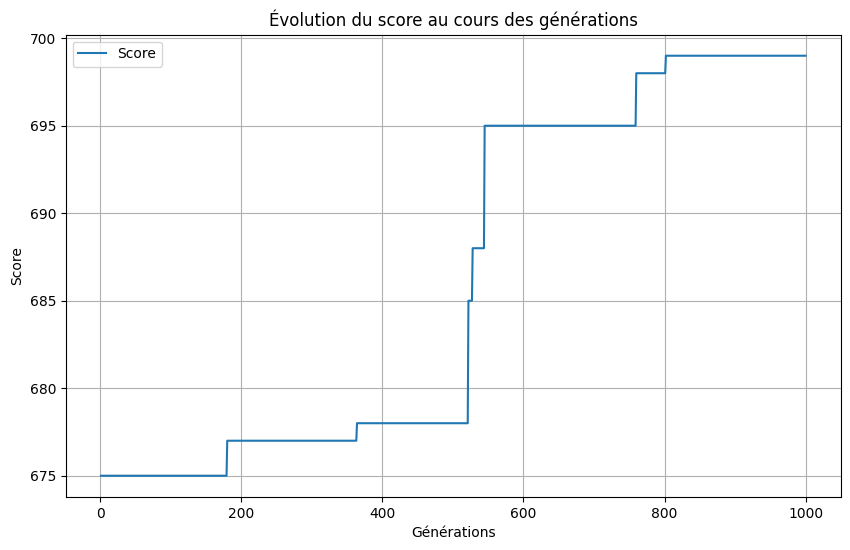

In [13]:
# Tracer l'évolution du score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, generations + 1), fitness_history, label="Score")
plt.xlabel("Générations")
plt.ylabel("Score")
plt.title("Évolution du score au cours des générations")
plt.legend()
plt.grid()
plt.show()

Affichage des biscuits sur le rouleau, le biscuit 0 est en jaune, le biscuit 1 en orange, le biscuit 2 en rouge et pour finir les cases vides en blanc

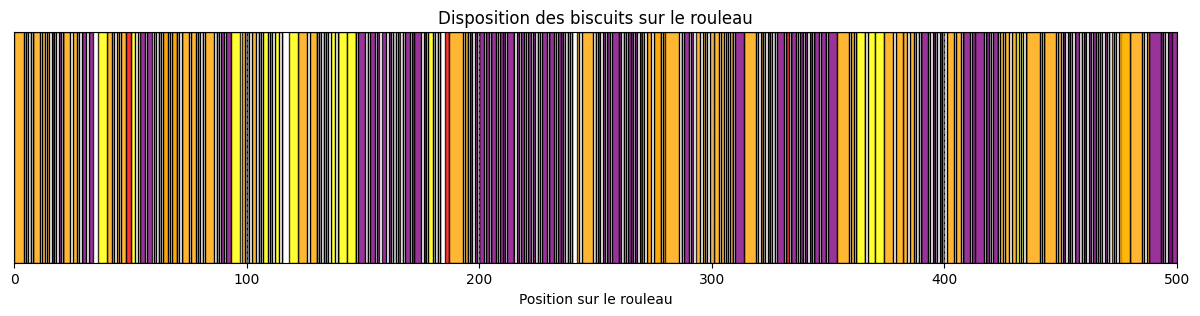

Nombre total de cases inutilisées : 178


In [14]:
def visualize_biscuit_placement(roll, best_placement):
    empty_cases = 0
    n = len(roll)  # Longueur du rouleau
    fig, ax = plt.subplots(figsize=(15, 3))

    # Définir les couleurs pour chaque type de biscuit
    biscuit_colors = {
        0: "yellow",
        1: "orange",
        2: "red",
        3: "purple"
    }

    # Ajouter des rectangles pour chaque biscuit
    for start, biscuit in best_placement:
        length = biscuit[0]  # Longueur du biscuit
        biscuit_id = biscuits.index(biscuit)  # Identifier le biscuit
        color = biscuit_colors.get(biscuit_id, "gray")  # Obtenir la couleur
        ax.add_patch(plt.Rectangle((start, 0), length, 1, edgecolor="black", facecolor=color, alpha=0.8))
        ax.text(start + length / 2, 0.5,"", ha="center", va="center", color="black", fontsize=8)

    # Marquer les cases inutilisées (en blanc)
    for i in range(n):
        if roll[i] == ["o"]:
            ax.add_patch(plt.Rectangle((i, 0), 1, 1, edgecolor="black", facecolor="white", alpha=1))
            empty_cases += 1

    # Ajuster l'affichage
    ax.set_xlim(0, n)
    ax.set_ylim(0, 1)
    ax.set_yticks([])
    ax.set_xlabel("Position sur le rouleau")
    ax.set_title("Disposition des biscuits sur le rouleau")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.show()
    print(f"Nombre total de cases inutilisées : {empty_cases}")

# Visualiser la disposition des biscuits
visualize_biscuit_placement(roll1, best_placement)


The result of the Genetic Algorithm is unstable: it can achieve very high scores, exceeding 690, but it tends to generate more unused cases compared to the Greedy algorithm. To surpass the performance of the Greedy algorithm, the Genetic Algorithm requires a large number of generations and a significant population size. However, this leads to a substantial increase in execution time.

For instance, with a population of 100 individuals and 500 generations, the execution time reaches approximately 103 seconds (or 1 minute and 43 seconds). This trade-off between result quality and execution time must be carefully considered when using the algorithm.

#Comparaison


For the Simulated Annealing algorithm, we have an average score of 400 and 42 unused cases for an execution time of 20 seconds.

For the Greedy algorithm, we have a score of 675 with only 15 unused case and an execution time of 0.002 seconds.

Clearly, for this problem, the Greedy algorithm is significantly better. It performs exceptionally well in situations where local decisions are relatively straightforward and can be made without requiring an extensive exploration of the entire solution space. In our case, the algorithm selects biscuits based on the value/length ratio, a local metric that optimizes each placement immediately without needing a global view of the problem.

Simulated Annealing, on the other hand, is designed to explore the entire solution space, sometimes accepting worse solutions to escape local minima. For a problem like ours, this exploration does not seem necessary, as local solutions are already very effective. Consequently, Simulated Annealing loses its efficiency.


In the end, we have the genetic algorithm, which gives us a better score of 690 but with a very long execution time. Therefore, it might be the best option if it is used only once but not suitable for regular use.

#Conclusion

This project focused on solving the problem of placing cookies on a roll while taking into account the defects present on the roll as well as the specific constraints of each cookie. Two algorithmic approaches were explored: Simulated Annealing and the Greedy algorithm. Several key insights were observed through this study.

The Greedy algorithm, based on maximizing the value-to-length ratio of the cookiestraduis en anglais, is quite efficient but not optimal

Simulated Annealing, although more flexible and capable of exploring a wider solution space, did not outperform the Greedy algorithm in this particular case. The random exploration of solutions and the acceptance of worse solutions to escape local minima, while potentially useful for more complex problems, were not necessary here. This led to less effective results and slower execution.

The project demonstrated that for a problem like this, a simple and efficient greedy algorithm can be sufficient to quickly achieve near-optimal solutions without requiring more complex and computationally expensive methods like Simulated Annealing.


We chose to use a greedy algorithm because the problem seemed locally solvable. This approach involves always placing the cookie that provides the highest value at each iteration, which immediately maximizes the value for the given situation. While this method does not guarantee a globally optimal solution, it offers several advantages that amply justify our choice.

First, the greedy algorithm is simple to implement and quick to execute, which is essential when decisions need to be made within a limited time frame (as in the project's context, where the individual had little time, making a greedy algorithm a practical option). Furthermore, in our case, the constraints imposed by the defects on the roll are well-handled by this approach, as the algorithm can evaluate the available options at each step and select the one that maximizes the gain while respecting the local constraints.

Lastly, although the result may not be optimal, this strategy ensures a high-quality solution that is close to the best outcome. This is particularly acceptable in our context, where the primary goal is to achieve a quick and effective solution rather than pursue perfect optimization.

The Simulated Annealing algorithm could have been an interesting approach in our case. Its ability to avoid local minima through the introduction of a random factor, particularly at the beginning of the process, is a notable advantage. This feature allows the algorithm to gradually favor higher-quality solutions as it converges.

However, in our situation, this method does not yield satisfactory results. This is likely due to the random nature of the constraints, which requires exploring a very large number of possibilities to find a viable solution. The main issue lies in the fact that when attempting to move or add a cookie, the constraints are often violated. This leads to the rejection of proposed solutions and a transition to the next iteration without significant progress.

This project allowed us to deepen our understanding of optimization algorithms like Greedy and Simulated Annealing. Solving an optimization problem similar to what a company might encounter was an interesting experience, as we had some freedom in choosing which algorithms to use, a decision that took time to determine.

We had to make some key decisions such as handling defects and interpreting how to code our version of the roll. To make these decisions, we worked as a team to find the solution that suited best both us and the problem at hand. While we cannot be certain that we found the most efficient solution, we are proud of the work accomplished and the challenges overcome, such as managing the referencing of cookies on the roll and verifying the constraints related to the cookies’ defects.

As for the company, they simply need to retrieve final_roll to obtain an optimal layout of cookies.

In [15]:
final_roll

[['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_2'],
 ['Biscuit_2'],
 ['Biscuit_0'],
 ['Biscuit_0'],
 ['Biscuit_0'],
 ['Biscuit_0'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_1'],
 ['Biscuit_2'],
 ['Biscuit_2'],
 ['Biscuit_0'],
 ['Biscuit_0'],
 ['Biscuit_0'],
 ['Biscuit_0'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscuit_3'],
 ['Biscu